<img src="http://oci02.img.iteso.mx/identidad_de_instancia_2018/ITESO/Logos%20ITESO/Logo-ITESO-Principal.jpg">

<center> <font color= #004A94> <font size = 6> Lic. Ingeniería Financiera </font> <br> <br> <font color= #047CFB> <font size = 4>I.F. Juan Pablo Estavillo - if709274@iteso.mx </font>

<center><font color= #004A94> <font size = 6> Microestructura y Sistemas de Trading </font> <br> <br>

<center><font color=#42c29b><font size=5> Laboratorio 1: Herramientas Computacionales </font> <br> <br>

<center> <font color= #047CFB> <font size = 4> Primavera 2020 </font>  |  <font color= #047CFB> <font size = 4> Repositorio: <a href='https://github.com/estavillo97'>Link</a></font>

---

# Resumen

uso de medias móviles para tomar decisiones de trading

# Codigo

In [1]:
import pandas as pd
import funciones as fn
import matplotlib.pyplot as plt
import ta 

In [2]:
OA_AK='1'+ 'e00e1b826556a3bb8b216a3fbd8df4e-df0c4a9a4a4dc3ebf248b4369f02db6' + '4'
OA_In = "EUR_USD"                    #se puede cambiar a cualquier moned a
OA_Gn = "D"                      
fini = pd.to_datetime("2019-02-20 00:00:00").tz_localize('GMT')  
ffin = pd.to_datetime("2020-02-20 00:00:00").tz_localize('GMT')  


df_pe =  pd.DataFrame(fn.f_precios_masivos(p0_fini=fini, p1_ffin=ffin, p2_gran=OA_Gn,
                             p3_inst=OA_In, p4_oatk=OA_AK, p5_ginc=4900))


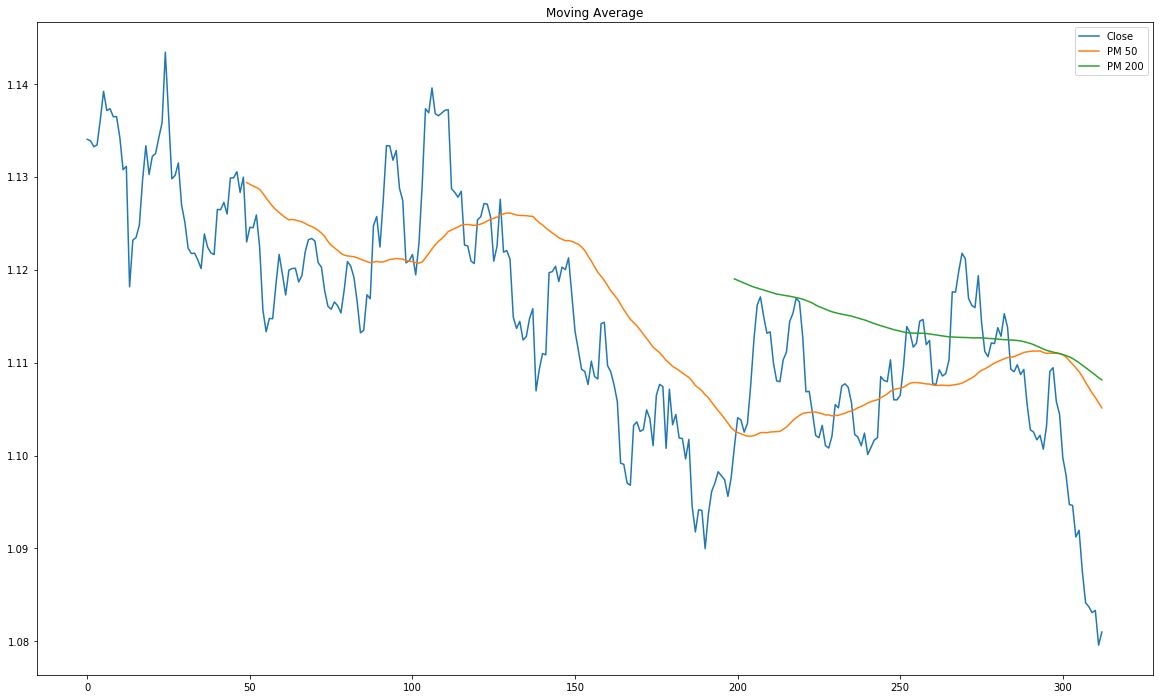

In [5]:
df_pe['PM_50'] = df_pe['Close'].rolling(50).mean()
df_pe['PM_200'] = df_pe['Close'].rolling(200).mean()
df_pe['Close']=df_pe['Close'].astype(float)
plt.figure(figsize=(20,12))
plt.plot(df_pe[:].Close, label = 'Close')
plt.plot(df_pe[:].PM_50 , label='PM 50')
plt.plot(df_pe[:].PM_200 , label='PM 200')
plt.title('Moving Average')
plt.legend()
plt.show()


In [6]:
conclusion = (lambda MA50, MA200: 'Compra' if MA50 >= MA200 else 'Vende')

In [7]:
df_pe['conclusion'] = pd.DataFrame(conclusion(df_pe['Open'][i], df_pe['Close'][i]) for i in range(len(df_pe['Open'])))

df_pe['conclusion']

0      Compra
1      Compra
2      Compra
3       Vende
4       Vende
        ...  
308    Compra
309    Compra
310    Compra
311    Compra
312     Vende
Name: conclusion, Length: 313, dtype: object

In [10]:
## desde este punto no se usa para tomar trading pero   
def strategy(ticker, start, end, days, MA=False, EMA=False, MACD=False, LongHold=False, LongShort=False):
    """
    calculates the return on a moving average strategy of your choice
    """
    # load the data
    #df =   'falta por hacer, usar eur-usd como prueba'
     #                       end=end)
    # Daily change in the asset value
    df["Difference"] = df["Adj Close"] - df["Adj Close"].shift()

    # only keep the adjusted close and daily change
    df = df[["Adj Close", "Difference"]]

    # choose which moving averages we want
    df = strategies(df=df, days=100, MA=MA, EMA=EMA, MACD=MACD)
    # drop na's from the MA calculations
    df.dropna(inplace=True)

    # DataFrame of the positions we wish to hold
    df_positions = positions(df, MA=MA, EMA=EMA, MACD=MACD)

    df_price_of_strategy = price_of_strategy(df, df_positions, LongHold=LongHold,
                                             LongShort=LongHold, MA=MA, EMA=EMA, MACD=MACD)

    # view summary statistics of the return series of the three strategies
    df_return_of_strategy = strategy_returns(df, df_price_of_strategy)
    df_return_of_strategy.dropna(inplace=True)
    table = erk.summary_stats(df_return_of_strategy, ppp=252)
    return df, table, df_return_of_strategy, df_positions, df_price_of_strategy


def plot_strategy(ticker, start, end, df):
    """
    Plot the performance of the strategy vs the performance of the asset
    """

    fig = plt.figure(figsize=(20, 10))
    ax1 = plt.plot(df)
    ax1 = plt.title("Comparing simple investment strategies for " +
                    ticker + " between " + start + " and " + end, fontsize=22)
    ax1 = plt.xlabel("Date", fontsize=18)
    ax1 = plt.ylabel("Price", fontsize=18)
    ax1 = plt.legend(list(df_return_of_strategy.columns), prop={"size": 22}, loc="upper left")
    plt.grid(True)
    plt.show()


def strategies(df, days, MA=False, EMA=False, MACD=False):
    """
    Add selected moving averages to the DataFrame
    """
    if MA == True:
        # simple moving average
        df["MA"] = df["Adj Close"].rolling(window=days).mean()

    if EMA == True:
        # exponential moving average
        df["EMA"] = df["Adj Close"].ewm(span=days).mean()

    if MACD == True:
        # exponential moving average
        df["EMA_26"] = df["EUR/USD.Adjusted"].ewm(span=26).mean()
        df["EMA_126"] = df["EUR/USD.Adjusted"].ewm(span=126).mean()

    return df


def positions(df, MA=False, EMA=False, MACD=False):
    """
    calculates the positions we should hold each day according to each strategy
    """
    df_positions = pd.DataFrame(index=df.index)
    if MA == True:
        # Add position type for each day for the MA
        MA_Position = []
        for i in range(0, df.shape[0]):
            if df["Adj Close"].iloc[i] > df["MA"].iloc[i]:
                MA_Position.append("Long")
            else:
                MA_Position.append("Short")
        df_positions["MA_Position"] = MA_Position

    if EMA == True:
        # Add position type for each day for the EMA
        EMA_Position = []
        for i in range(0, df.shape[0]):
            if df["Adj Close"].iloc[i] > df["EMA"].iloc[i]:
                EMA_Position.append("Long")
            else:
                EMA_Position.append("Short")
        df_positions["EMA_Position"] = EMA_Position

    if MACD == True:
        # Add position type for each day for the EMA
        MACD_Position = []
        for i in range(0, df.shape[0]):
            if df["EMA_26"].iloc[i] > df["EMA_126"].iloc[i]:
                MACD_Position.append("Long")
            else:
                MACD_Position.append("Short")
        df_positions["MACD_Position"] = MACD_Position

    return df_positions


def price_of_strategy(df, df_positions, LongHold=False, LongShort=False, MA=False, EMA=False, MACD=False):
    """
    given a DataFrame containing one or more position vectors,
    Create price process of the strategies, adding the daily change if we are long
    subtracting if we are short.
    """
    df_price_of_strategy = pd.DataFrame(index=df_positions.index)
    df_price_of_strategy["asset price"] = df["Adj Close"]
    # long hold will long the strategy if condition is met, but instead of shorting it will
    # simply sell and wait for another entry point. A better version of this would be to
    # buy bonds instead of holding cash.
    if LongHold == True:
        if MA == True:
            LongHold = [0] * df.shape[0]
            LongHold[0] = df["Adj Close"].iloc[0]
            for i in range(1, df_positions.shape[0]):
                if df_positions["MA_Position"].iloc[i] == "Long":
                    LongHold[i] = LongHold[i - 1] + df["Difference"].iloc[i]
                else:
                    LongHold[i] = LongHold[i - 1]
            df_price_of_strategy["LongHold MA"] = LongHold

        if EMA == True:
            LongHold = [0] * df.shape[0]
            LongHold[0] = df["Adj Close"].iloc[0]
            for i in range(1, df_positions.shape[0]):
                if df_positions["EMA_Position"].iloc[i] == "Long":
                    LongHold[i] = LongHold[i - 1] + df["Difference"].iloc[i]
                else:
                    LongHold[i] = LongHold[i - 1]
            df_price_of_strategy["LongHold EMA"] = LongHold

        if MACD == True:
            LongHold = [0] * df.shape[0]
            LongHold[0] = df["Adj Close"].iloc[0]
            for i in range(1, df_positions.shape[0]):
                if df_positions["MACD_Position"].iloc[i] == "Long":
                    LongHold[i] = LongHold[i - 1] + df["Difference"].iloc[i]
                else:
                    LongHold[i] = LongHold[i - 1]
            df_price_of_strategy["LongHold MACD"] = LongHold

    if LongShort == True:
        if MA == True:
            LongShort = [0] * df.shape[0]
            LongShort[0] = df["Adj Close"].iloc[0]
            for i in range(1, df.shape[0]):
                if df_positions["MA_Position"].iloc[i] == "Long":
                    LongShort[i] = LongShort[i - 1] + df["Difference"].iloc[i]
                else:
                    LongShort[i] = LongShort[i - 1] - df["Difference"].iloc[i]
            df_price_of_strategy["LongShort MA"] = LongShort

        if EMA == True:
            LongShort = [0] * df.shape[0]
            LongShort[0] = df["Adj Close"].iloc[0]
            for i in range(1, df.shape[0]):
                if df_positions["EMA_Position"].iloc[i] == "Long":
                    LongShort[i] = LongShort[i - 1] + df["Difference"].iloc[i]
                else:
                    LongShort[i] = LongShort[i - 1] - df["Difference"].iloc[i]
            df_price_of_strategy["LongShort EMA"] = LongShort

        if MACD == True:
            LongShort = [0] * df.shape[0]
            LongShort[0] = df["Adj Close"].iloc[0]
            for i in range(1, df.shape[0]):
                if df_positions["MACD_Position"].iloc[i] == "Long":
                    LongShort[i] = LongShort[i - 1] + df["Difference"].iloc[i]
                else:
                    LongShort[i] = LongShort[i - 1] - df["Difference"].iloc[i]
            df_price_of_strategy["LongShort MACD"] = LongShort
    return df_price_of_strategy


def strategy_returns(df, df_price_of_strategy):
    """
    input the price series of a strategy and output the return series
    """
    df_return_of_strategy = pd.DataFrame(index=df_price_of_strategy.index)
    cols = df_price_of_strategy.columns

    for priceSeries in cols:
        df_return_of_strategy[priceSeries] = (df_price_of_strategy[priceSeries]
                                              - df_price_of_strategy[priceSeries].shift()) / (
                                             df_price_of_strategy[priceSeries])

    return df_return_of_strategy


In [9]:
df_pe['conclusion']

0      Compra
1      Compra
2      Compra
3       Vende
4       Vende
        ...  
308    Compra
309    Compra
310    Compra
311    Compra
312     Vende
Name: conclusion, Length: 313, dtype: object